# Intro to Artificial Neural Networks

In [1]:
import numpy as np
import random
from datetime import datetime
from sklearn.datasets import load_iris,fetch_mldata
from sklearn.linear_model import Perceptron
from sklearn.metrics import mean_squared_error, accuracy_score, log_loss
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
print("Tensorflow:", tf.__version__)

import sys
print("Python Version:", sys.version)

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

(u'Tensorflow:', '1.1.0')
(u'Python Version:', '2.7.14 |Anaconda, Inc.| (default, Dec  7 2017, 17:05:42) \n[GCC 7.2.0]')


# Basic Perceptron

In [ ]:
iris = load_iris()
X = iris.data[:, (2, 3)] # Petal length and width
y = (iris.target == 0).astype(np.int) # Iris Setosa
m = X.shape[0]
train_size = int(m * 0.8)

X_tr, X_ts, y_tr, y_ts = train_test_split(
    X, y, test_size=0.5, random_state=42)

per_clf = Perceptron(random_state=42)
per_clf.fit(X_tr, y_tr)
y_pred = per_clf.predict(X_ts)
mean_squared_error(y_ts, y_pred)

In [ ]:
y_ts

# Training MLP with High Level API 

In [11]:
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [12]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(
    hidden_units=[300,100], 
    n_classes=10,
    feature_columns=feature_cols)

dnn_clf = tf.contrib.learn.SKCompat(dnn_clf)
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': None, '_save_checkpoints_secs': 600, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_tf_random_seed': None, '_task_type': None, '_environment': 'local', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7feed1ebe210>, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_num_worker_replicas': 0, '_task_id': 0, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000, '_master': ''}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:S

INFO:tensorflow:global_step/sec: 248.149
INFO:tensorflow:loss = 0.0183032, step = 7001 (0.402 sec)
INFO:tensorflow:global_step/sec: 260.411
INFO:tensorflow:loss = 0.0068844, step = 7101 (0.384 sec)
INFO:tensorflow:global_step/sec: 262.149
INFO:tensorflow:loss = 0.0538464, step = 7201 (0.382 sec)
INFO:tensorflow:global_step/sec: 258.461
INFO:tensorflow:loss = 0.006831, step = 7301 (0.387 sec)
INFO:tensorflow:global_step/sec: 254.607
INFO:tensorflow:loss = 0.0164593, step = 7401 (0.393 sec)
INFO:tensorflow:global_step/sec: 193.102
INFO:tensorflow:loss = 0.00416407, step = 7501 (0.517 sec)
INFO:tensorflow:global_step/sec: 201.486
INFO:tensorflow:loss = 0.0149942, step = 7601 (0.496 sec)
INFO:tensorflow:global_step/sec: 204.599
INFO:tensorflow:loss = 0.0042276, step = 7701 (0.490 sec)
INFO:tensorflow:global_step/sec: 247.541
INFO:tensorflow:loss = 0.00570819, step = 7801 (0.403 sec)
INFO:tensorflow:global_step/sec: 254.976
INFO:tensorflow:loss = 0.0108287, step = 7901 (0.392 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 204.341
INFO:tensorflow:loss = 0.00123763, step = 15201 (0.492 sec)
INFO:tensorflow:global_step/sec: 145.409
INFO:tensorflow:loss = 0.0019279, step = 15301 (0.687 sec)
INFO:tensorflow:global_step/sec: 167.684
INFO:tensorflow:loss = 0.00130911, step = 15401 (0.594 sec)
INFO:tensorflow:global_step/sec: 255.697
INFO:tensorflow:loss = 0.004029, step = 15501 (0.391 sec)
INFO:tensorflow:global_step/sec: 174.067
INFO:tensorflow:loss = 0.00456895, step = 15601 (0.574 sec)
INFO:tensorflow:global_step/sec: 259.518
INFO:tensorflow:loss = 0.00664692, step = 15701 (0.386 sec)
INFO:tensorflow:global_step/sec: 247.07
INFO:tensorflow:loss = 0.0012578, step = 15801 (0.405 sec)
INFO:tensorflow:global_step/sec: 246.14
INFO:tensorflow:loss = 0.000789873, step = 15901 (0.407 sec)
INFO:tensorflow:global_step/sec: 212.331
INFO:tensorflow:loss = 0.00411426, step = 16001 (0.470 sec)
INFO:tensorflow:global_step/sec: 259.907
INFO:tensorflow:loss = 0.002494, step = 16101 (0.385 se

INFO:tensorflow:loss = 0.00218599, step = 23301 (0.500 sec)
INFO:tensorflow:global_step/sec: 229.403
INFO:tensorflow:loss = 0.000680473, step = 23401 (0.436 sec)
INFO:tensorflow:global_step/sec: 219.039
INFO:tensorflow:loss = 0.000714336, step = 23501 (0.456 sec)
INFO:tensorflow:global_step/sec: 225.772
INFO:tensorflow:loss = 0.000882621, step = 23601 (0.443 sec)
INFO:tensorflow:global_step/sec: 244.228
INFO:tensorflow:loss = 0.000164185, step = 23701 (0.410 sec)
INFO:tensorflow:global_step/sec: 221.44
INFO:tensorflow:loss = 0.00205709, step = 23801 (0.451 sec)
INFO:tensorflow:global_step/sec: 178.995
INFO:tensorflow:loss = 0.00195006, step = 23901 (0.559 sec)
INFO:tensorflow:global_step/sec: 243.156
INFO:tensorflow:loss = 0.000952045, step = 24001 (0.411 sec)
INFO:tensorflow:global_step/sec: 230.447
INFO:tensorflow:loss = 0.00056298, step = 24101 (0.434 sec)
INFO:tensorflow:global_step/sec: 247.826
INFO:tensorflow:loss = 0.00177146, step = 24201 (0.404 sec)
INFO:tensorflow:global_step

INFO:tensorflow:loss = 0.000900319, step = 31401 (0.408 sec)
INFO:tensorflow:global_step/sec: 231.536
INFO:tensorflow:loss = 0.00032652, step = 31501 (0.431 sec)
INFO:tensorflow:global_step/sec: 245.78
INFO:tensorflow:loss = 0.000247459, step = 31601 (0.407 sec)
INFO:tensorflow:global_step/sec: 238.342
INFO:tensorflow:loss = 0.000703695, step = 31701 (0.420 sec)
INFO:tensorflow:global_step/sec: 235.907
INFO:tensorflow:loss = 0.000195983, step = 31801 (0.424 sec)
INFO:tensorflow:global_step/sec: 251.273
INFO:tensorflow:loss = 0.000710934, step = 31901 (0.398 sec)
INFO:tensorflow:global_step/sec: 250.172
INFO:tensorflow:loss = 0.000314683, step = 32001 (0.400 sec)
INFO:tensorflow:global_step/sec: 249.341
INFO:tensorflow:loss = 0.000504329, step = 32101 (0.401 sec)
INFO:tensorflow:global_step/sec: 227.673
INFO:tensorflow:loss = 0.00108984, step = 32201 (0.439 sec)
INFO:tensorflow:global_step/sec: 242.843
INFO:tensorflow:loss = 0.000578693, step = 32301 (0.412 sec)
INFO:tensorflow:global_s

INFO:tensorflow:loss = 0.000299522, step = 39501 (0.578 sec)
INFO:tensorflow:global_step/sec: 233.529
INFO:tensorflow:loss = 0.000585099, step = 39601 (0.428 sec)
INFO:tensorflow:global_step/sec: 261.666
INFO:tensorflow:loss = 0.000185934, step = 39701 (0.383 sec)
INFO:tensorflow:global_step/sec: 178.871
INFO:tensorflow:loss = 0.000604463, step = 39801 (0.559 sec)
INFO:tensorflow:global_step/sec: 246.318
INFO:tensorflow:loss = 0.00069093, step = 39901 (0.406 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /tmp/tmp8tTcqp/model.ckpt.
INFO:tensorflow:Loss for final step: 0.000390089.


SKCompat()

In [ ]:
y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

In [ ]:
y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

# Training DNN with Plain TF

## Construction Phase

In [2]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [3]:
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

I could make my own neuron layer...

In [ ]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else: 
            return Z

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation=tf.nn.relu)    
    logits = neuron_layer(hidden2, n_outputs, "outputs")

OR! I can use TF's api for a dense layer.

In [4]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)    
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [5]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [6]:
l_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(l_rate)
    train = optimizer.minimize(loss)

In [7]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    acc_sum = tf.summary.scalar("Accuracy", accuracy)

In [8]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
root_logdir = "tf_logs"
logdir = "{}/run-{}/".format(root_logdir, now)
train_writer = tf.summary.FileWriter(logdir + '/train', tf.get_default_graph())
test_writer = tf.summary.FileWriter(logdir + '/test')

In [9]:
show_graph(tf.get_default_graph())

In [ ]:
reset_graph()

## Execution Phase

In [13]:
n_epochs = 40
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, feed_dict={X:X_batch, y:y_batch})
        acc_train, train_sum = sess.run(
            [accuracy, acc_sum],
            feed_dict={X:X_batch, y:y_batch})
        acc_test, test_sum = sess.run(
            [accuracy, acc_sum],
            feed_dict={X:mnist.test.images, y:mnist.test.labels})
        train_writer.add_summary(train_sum, epoch)
        test_writer.add_summary(test_sum, epoch)
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
        
    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Train accuracy: 0.92 Test accuracy: 0.9017
1 Train accuracy: 0.94 Test accuracy: 0.919
2 Train accuracy: 0.98 Test accuracy: 0.9281
3 Train accuracy: 1.0 Test accuracy: 0.9365
4 Train accuracy: 0.98 Test accuracy: 0.9427
5 Train accuracy: 0.92 Test accuracy: 0.9463
6 Train accuracy: 0.96 Test accuracy: 0.95
7 Train accuracy: 0.94 Test accuracy: 0.9525
8 Train accuracy: 0.98 Test accuracy: 0.9554
9 Train accuracy: 0.98 Test accuracy: 0.9573
10 Train accuracy: 0.96 Test accuracy: 0.9607
11 Train accuracy: 0.94 Test accuracy: 0.9625
12 Train accuracy: 0.94 Test accuracy: 0.9641
13 Train accuracy: 0.98 Test accuracy: 0.9656
14 Train accuracy: 0.94 Test accuracy: 0.9662
15 Train accuracy: 0.94 Test accuracy: 0.9669
16 Train accuracy: 0.96 Test accuracy: 0.9688
17 Train accuracy: 1.0 Test accuracy: 0.9695
18 Train accuracy: 1.0 Test accuracy: 0.9709
19 Train accuracy: 0.96 Test accuracy: 0.9713
20 Train accuracy: 1.0 Test accuracy: 0.9707
21 Train accuracy: 0.98 Test accuracy: 0.9732
22 Tr

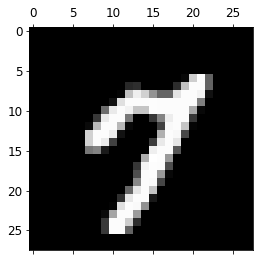

In [14]:
rand_idx = random.randint(0, len(mnist.test.images))
random_number = mnist.test.images[rand_idx]
plt.matshow(random_number.reshape(28, 28), cmap=plt.cm.gray)

In [ ]:
with tf.Session() as sess:
    print(save_path)    
    saver.restore(sess, save_path)
    print(np.argmax(logits.eval(feed_dict={X:random_number.reshape(1, 784)})))